# Decision Trees INCLASS using Scikitlearn
Easy setup,works with categories as well as numbers

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Get the iris dataset, then train a decision tree on it and then see how accurate it is

In [97]:
from sklearn import datasets
iris = datasets.load_iris()
dfi = pd.DataFrame(iris.data, columns=iris.feature_names)
dfi.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [105]:
mapper={v:i for v,i in enumerate(iris.target_names)}
def fun(x):
    return mapper[x]

#hmmm...iris.target is a np.array of ints, 
#how to efficiently map the above function to an np.array?
#vectorize it
vfun=np.vectorize(fun)

#then apply it
dfi['target']=vfun(iris.target)
dfi.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
#it looks like the dataset is balanced
dfi.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [117]:
#see if anything is obvious
sns.pairplot(data=dfi, hue='target');

## It looks like Setosa is easy to distinguish from Versicolor and Virginica, but Versicolor and Virginica are not linearly seperable

In [33]:
from sklearn.metrics import accuracy_score

### Split out a train and test set

In [109]:
#split out a test set
from sklearn.model_selection import train_test_split
train, test, train_y, test_y = train_test_split(iris.data[:,[0,1,2,3]], iris.target, test_size = 0.6)

### Train classifier

In [113]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(train,train_y)

preds = clf.predict(test)
print(f'Accuracy ={clf.score(test, test_y)}')

# _=tree.plot_tree(clf)

DecisionTreeClassifier(max_depth=2)

Accuracy =0.9555555555555556


### Check out the splits and why

'Synthetic.pdf'

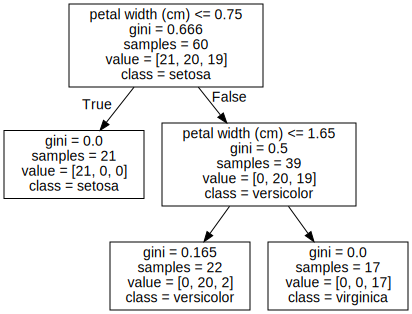

In [114]:
#just another way to look at the data, possibly with a little better info
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],class_names=[mapper[0],mapper[1],mapper[2]])  
graph = graphviz.Source(dot_data) 
graph.render("Synthetic")
graph

### Where were The errors? 

From pairplot it looks like setosa is linearly seperable, so the classifier should do well on it, the other 2 will be where the problems occur

In [115]:
#which rows are wrong?
test[preds!=test_y]

array([[6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [7.2, 3. , 5.8, 1.6]])

In [116]:
#which preds were wrong?
for pred,tst_y in zip(preds,test_y):
    if(pred!=tst_y):
        print(f'pred={fun(pred)} should have been {fun(tst_y)}')

pred=versicolor should have been virginica
pred=virginica should have been versicolor
pred=virginica should have been versicolor
pred=versicolor should have been virginica


Look at pairplot above, setosa is clearly linearly seperable from virginica and versicolor
You would expect no classification errors for sertosis, which is what we have.